In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<h1>Load the dataset</h1>

In [35]:
df = pd.read_csv('datasets\\Family Income and Expenditure.csv')  

In [36]:
df

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41539,119773,XII - SOCCSKSARGEN,44875,Enterpreneurial Activities,1,23675,21542,1476,6120,1632,...,0,0,0,0,0,1,0,0,0,0
41540,137320,XII - SOCCSKSARGEN,31157,Enterpreneurial Activities,1,2691,1273,1886,4386,1840,...,0,0,0,0,0,3,0,0,0,0
41541,133171,XII - SOCCSKSARGEN,45882,Enterpreneurial Activities,2,28646,27339,480,4796,1232,...,0,0,0,0,0,1,0,0,0,0
41542,129500,XII - SOCCSKSARGEN,81416,Enterpreneurial Activities,1,29996,26655,2359,17730,2923,...,0,0,0,0,0,2,0,0,0,0


In [37]:
insights = []

<h1># Insight 1: Average Household Income by Region</h1>

<h3>Based on the graph, the National Capital Region (NCR) has the highest average household income, followed by CALABARZON and Central Luzon. This trend indicates that among all regions, NCR provides the most job opportunities, contributing to higher earnings for residents in the area.</h3>

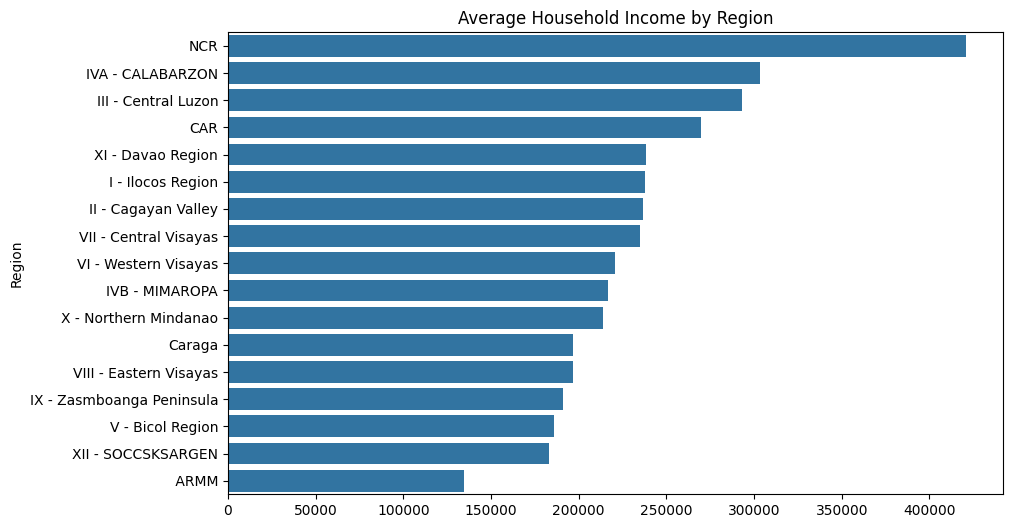

In [38]:
avg_income_by_region = df.groupby("Region")["Total Household Income"].mean().sort_values(ascending=False)
insights.append(("Which region has the highest average household income?", avg_income_by_region.idxmax()))
plt.figure(figsize=(10,6))
sns.barplot(x=avg_income_by_region.values, y=avg_income_by_region.index)
plt.title("Average Household Income by Region")
plt.show()

<h1># Insight 2: Average Food Expenditure by Region</h1>

<h3>Based on the graph, the National Capital Region (NCR) has the highest average food expenditure, followed by CALABARZON and Central Luzon. This suggests that NCR residents spend more on food, possibly due to higher food prices, greater purchasing power, or a preference for dining out. The regional differences in spending may reflect variations in income levels, cost of living, and lifestyle choices.</h3>

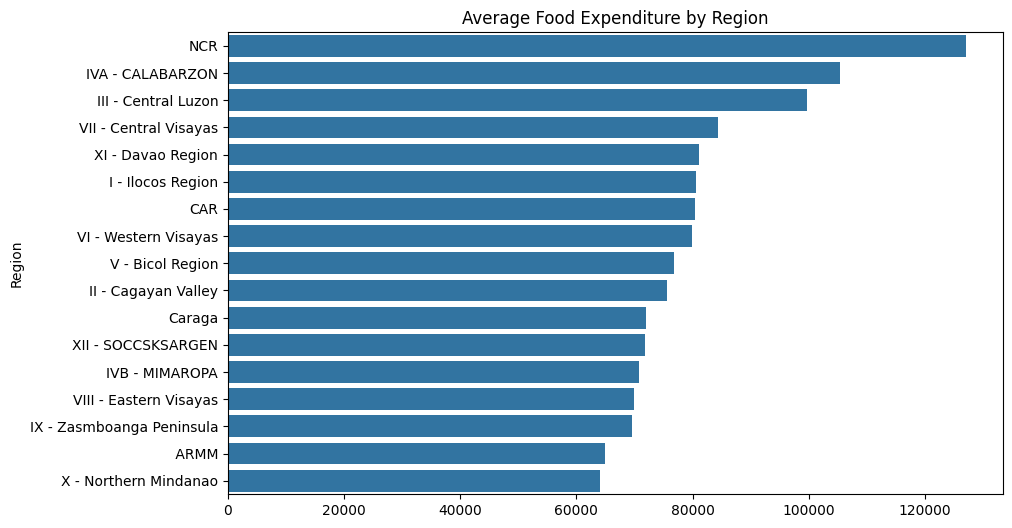

In [39]:
avg_food_by_region = df.groupby("Region")["Total Food Expenditure"].mean().sort_values(ascending=False)
insights.append(("Which region spends the most on food?", avg_food_by_region.idxmax()))
plt.figure(figsize=(10,6))
sns.barplot(x=avg_food_by_region.values, y=avg_food_by_region.index)
plt.title("Average Food Expenditure by Region")
plt.show()

<h1># Insight 3: Correlation Between Income and Food Expenditure</h1>

<h3>The graph shows a clear correlation between household income and food expenditure, with higher-income households spending more on food. This trend highlights how financial capacity influences consumption patterns, affected by factors like regional food costs, dietary habits, and lifestyle choices.</h3>

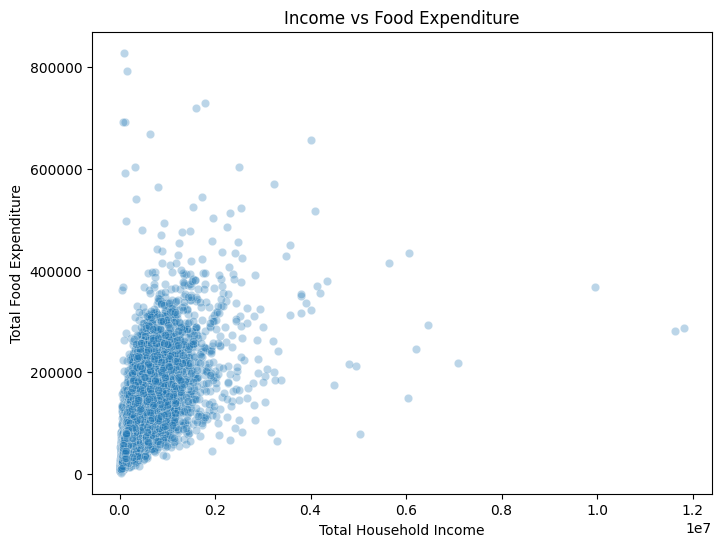

In [40]:
corr_income_food = df["Total Household Income"].corr(df["Total Food Expenditure"])
insights.append(("Is there a correlation between income and food expenditure?", f"{corr_income_food:.2f}"))
plt.figure(figsize=(8,6))
sns.scatterplot(x="Total Household Income", y="Total Food Expenditure", data=df, alpha=0.3)
plt.title("Income vs Food Expenditure")
plt.show()

<h1># Insight 4: Average Non-Food Expenditures</h1>

<h3>Based on the graph, the highest average non-food expenditure category is in Transportation, followed by other essential expenses such as education and medical care, This trend suggests that households spend their income more in Transportation, reflecting its importance in daily life. 

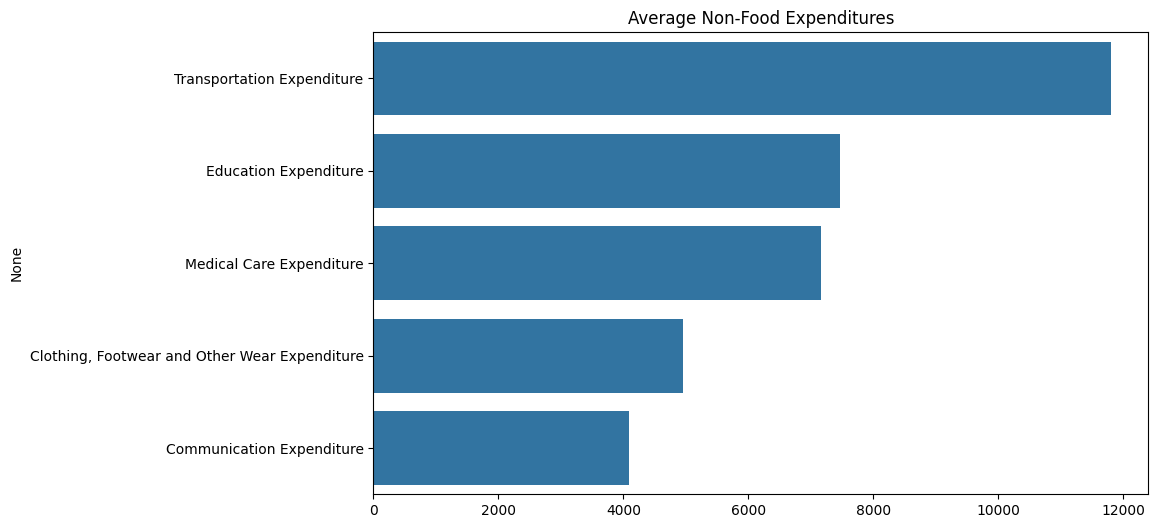

In [41]:
non_food_cols = [
    "Education Expenditure", "Medical Care Expenditure",
    "Transportation Expenditure", "Communication Expenditure",
    "Clothing, Footwear and Other Wear Expenditure"
]
avg_non_food = df[non_food_cols].mean().sort_values(ascending=False)
insights.append(("Which non-food category has the highest average expenditure?", avg_non_food.idxmax()))
plt.figure(figsize=(10,6))
sns.barplot(x=avg_non_food.values, y=avg_non_food.index)
plt.title("Average Non-Food Expenditures")
plt.show()

<h1># Insight 5: Family Size by Income Quartile</h1>

<h3>Based on the graph, the Q4 income quartile has the largest average family size. This trend suggests that households in this quartile tend to have more family members compared to others, potentially influenced by economic conditions, cultural factors, or household living arrangements..</h3>

C:\Users\Admin\AppData\Local\Temp\ipykernel_5596\2305917765.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_family_size = df.groupby("income_quartile")["Total Number of Family members"].mean()


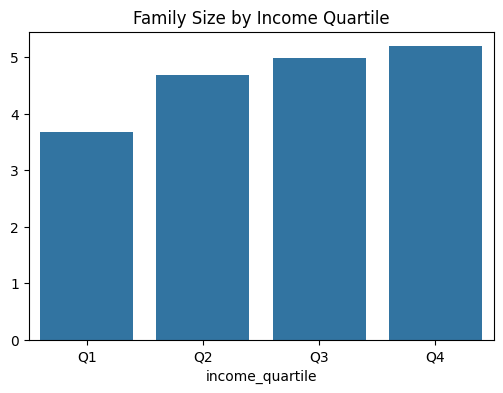

In [42]:
df["income_quartile"] = pd.qcut(df["Total Household Income"], 4, labels=["Q1", "Q2", "Q3", "Q4"])
avg_family_size = df.groupby("income_quartile")["Total Number of Family members"].mean()
insights.append(("Which income quartile has the largest average family size?", avg_family_size.idxmax()))
plt.figure(figsize=(6,4))
sns.barplot(x=avg_family_size.index, y=avg_family_size.values)
plt.title("Family Size by Income Quartile")
plt.show()


<h1># Insight 6: Average Medical Care Expenditure by Region</h1>

<h3>CALABARZON (Region IVA) has the highest average medical care expenditure, with households spending around ₱10,735.02. This suggests greater healthcare allocation due to factors like improved access to medical services, higher health awareness, or an aging population. The urbanized nature of CALABARZON may also contribute to higher healthcare costs, influencing household spending in this category.</h3>


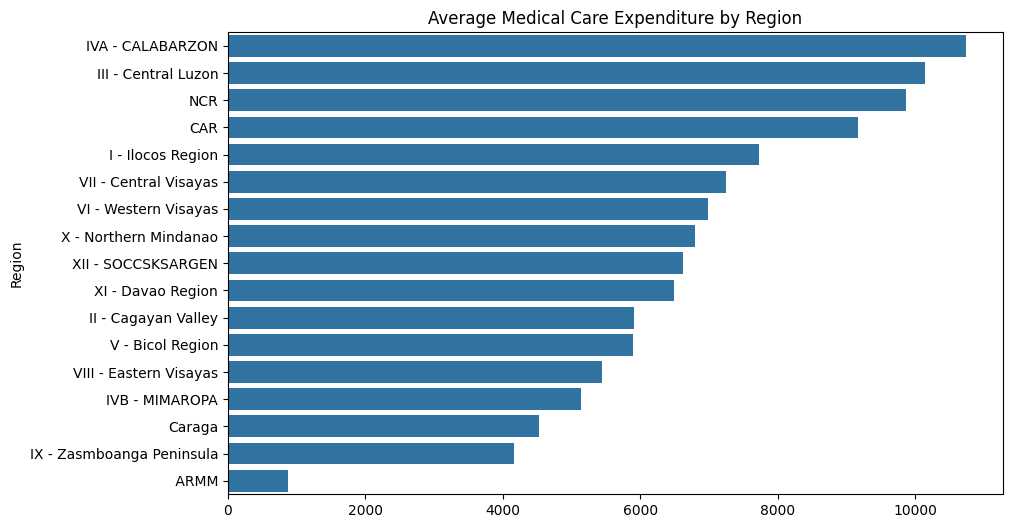

In [44]:
avg_medical_by_region = df.groupby("Region")["Medical Care Expenditure"].mean().sort_values(ascending=False)
insights.append(("Which region spends the most on medical care?", avg_medical_by_region.idxmax()))
plt.figure(figsize=(10,6))
sns.barplot(x=avg_medical_by_region.values, y=avg_medical_by_region.index)
plt.title("Average Medical Care Expenditure by Region")
plt.show()

<h1># Insight 7: Average Education Expenditure by Region</h1>

<h3>The National Capital Region (NCR) has the highest average education expenditure, indicating a strong emphasis on academic investment. This may be driven by better access to educational institutions, a larger population of school-aged children, and a higher value placed on academic attainment. The elevated spending could also reflect higher tuition fees, a greater presence of private schools, and stronger financial capability among families. Overall, this trend underscores regional differences in educational priorities and resource allocation.</h3>


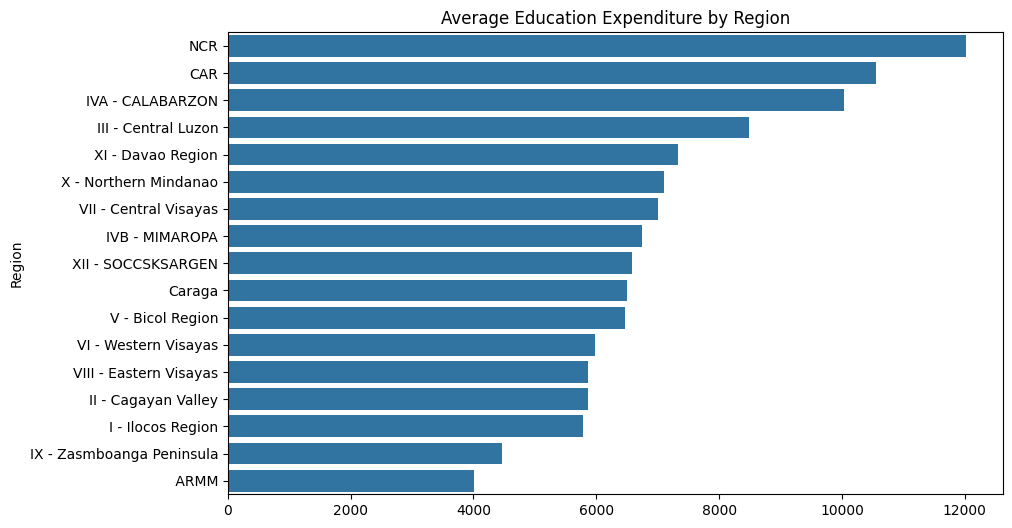

In [45]:
avg_education_by_region = df.groupby("Region")["Education Expenditure"].mean().sort_values(ascending=False)
insights.append(("Which region spends the most on education?", avg_education_by_region.idxmax()))
plt.figure(figsize=(10,6))
sns.barplot(x=avg_education_by_region.values, y=avg_education_by_region.index)
plt.title("Average Education Expenditure by Region")
plt.show()

<h1># Insight 8: Average Transportation Expenditure by Region</h1>

<h3>Based on the chart of average transportation expenditure by region, the region with the highest spending is NCR Region. This indicates that households in this region allocate more of their income to transportation, which may be influenced by factors such as urban sprawl, the need for long commutes, limited access to public transportation, or a higher number of privately owned vehicles. Additionally, economic activity and infrastructure development in the region could contribute to increased mobility and, consequently, higher transportation expenses. This reflects how transportation needs and patterns vary significantly across regions in the country.</h3>

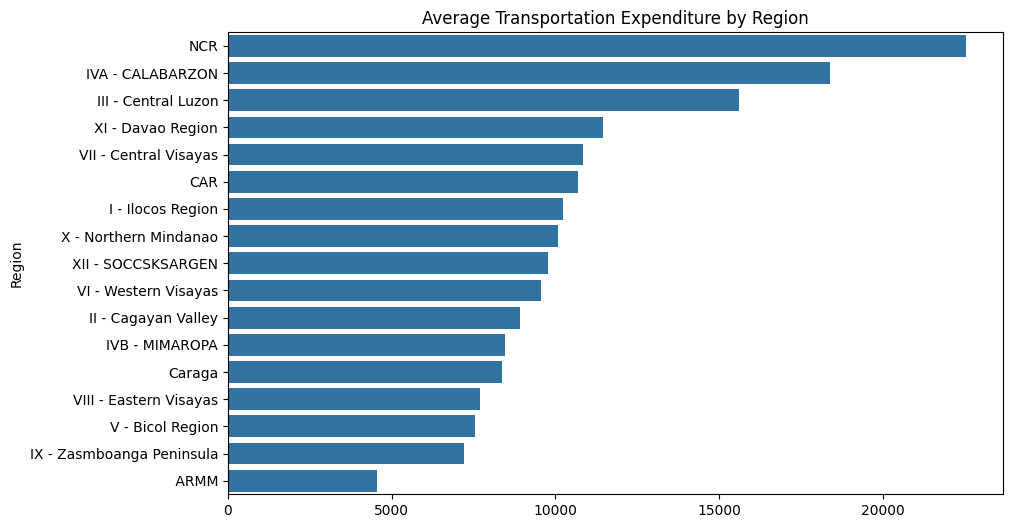

In [46]:
avg_transport_by_region = df.groupby("Region")["Transportation Expenditure"].mean().sort_values(ascending=False)
insights.append(("Which region spends the most on transportation?", avg_transport_by_region.idxmax()))
plt.figure(figsize=(10,6))
sns.barplot(x=avg_transport_by_region.values, y=avg_transport_by_region.index)
plt.title("Average Transportation Expenditure by Region")
plt.show()

<h1># Insight 9: Average Communication Expenditure by Region</h1>

<h3>Households in the National Capital Region (NCR) have the highest average communication expenditure, likely due to increased digital connectivity, remote work, online education, and access to telecom infrastructure. This spending pattern reflects the region's emphasis on technology for both personal and professional use, highlighting its role in shaping household expenses.</h3>

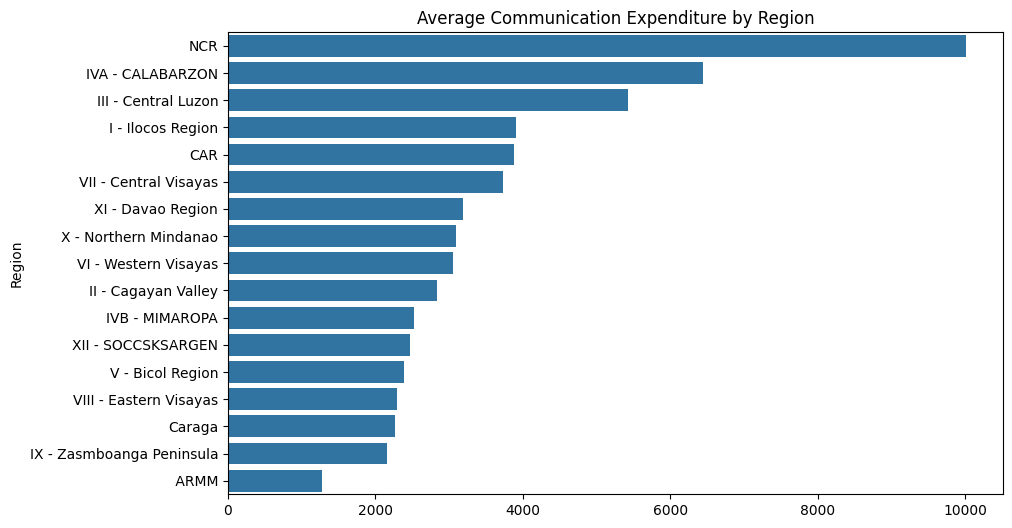

In [47]:
avg_comm_by_region = df.groupby("Region")["Communication Expenditure"].mean().sort_values(ascending=False)
insights.append(("Which region spends the most on communication?", avg_comm_by_region.idxmax()))
plt.figure(figsize=(10,6))
sns.barplot(x=avg_comm_by_region.values, y=avg_comm_by_region.index)
plt.title("Average Communication Expenditure by Region")
plt.show()

<h1># Insight 10: Average Clothing Expenditure by Region</h1>

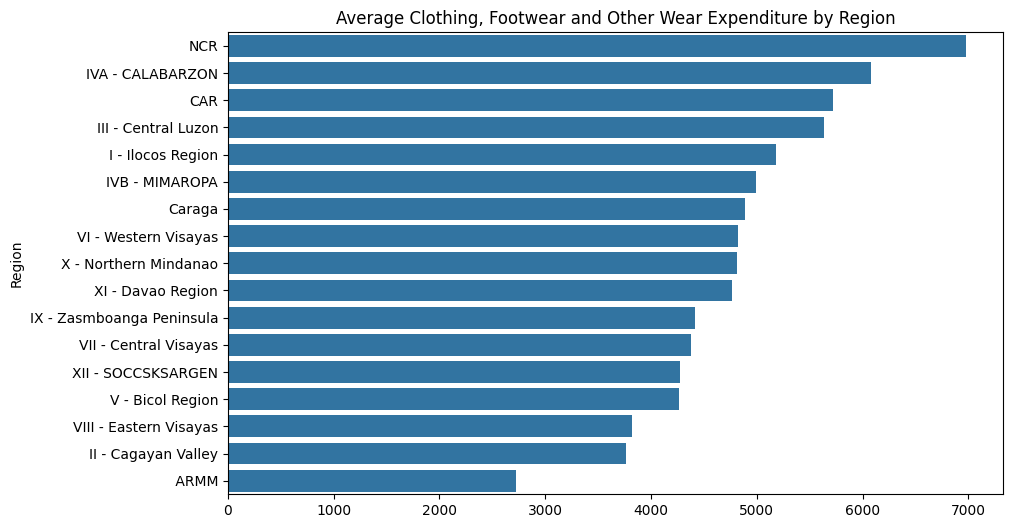

In [48]:
avg_clothing_by_region = df.groupby("Region")["Clothing, Footwear and Other Wear Expenditure"].mean().sort_values(ascending=False)
insights.append(("Which region spends the most on clothing and footwear?", avg_clothing_by_region.idxmax()))
plt.figure(figsize=(10,6))
sns.barplot(x=avg_clothing_by_region.values, y=avg_clothing_by_region.index)
plt.title("Average Clothing, Footwear and Other Wear Expenditure by Region")
plt.show()

<h1># Insight 11: Food Expenditure as a Percentage of Income</h1>

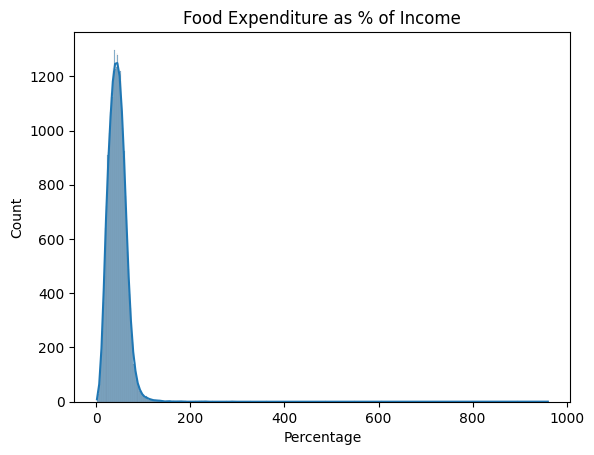

In [49]:
df["Food_Exp_Percent"] = df["Total Food Expenditure"] / df["Total Household Income"] * 100
avg_food_exp_percent = df["Food_Exp_Percent"].mean()
insights.append(("What is the average percentage of income spent on food?", f"{avg_food_exp_percent:.2f}%"))
sns.histplot(df["Food_Exp_Percent"], kde=True)
plt.title("Food Expenditure as % of Income")
plt.xlabel("Percentage")
plt.show()

<h1># Insight 12: Households with Food Expenditure Greater than 50% of Income</h1>

In [50]:
high_food_exp = (df["Food_Exp_Percent"] > 50).sum()
insights.append(("How many households spend more than 50% of their income on food?", high_food_exp))
print(f"Households spending >50% of income on food: {high_food_exp}")

Households spending >50% of income on food: 15249


<h1># Insight 13: Correlation Matrix of All Numeric Features</h1>

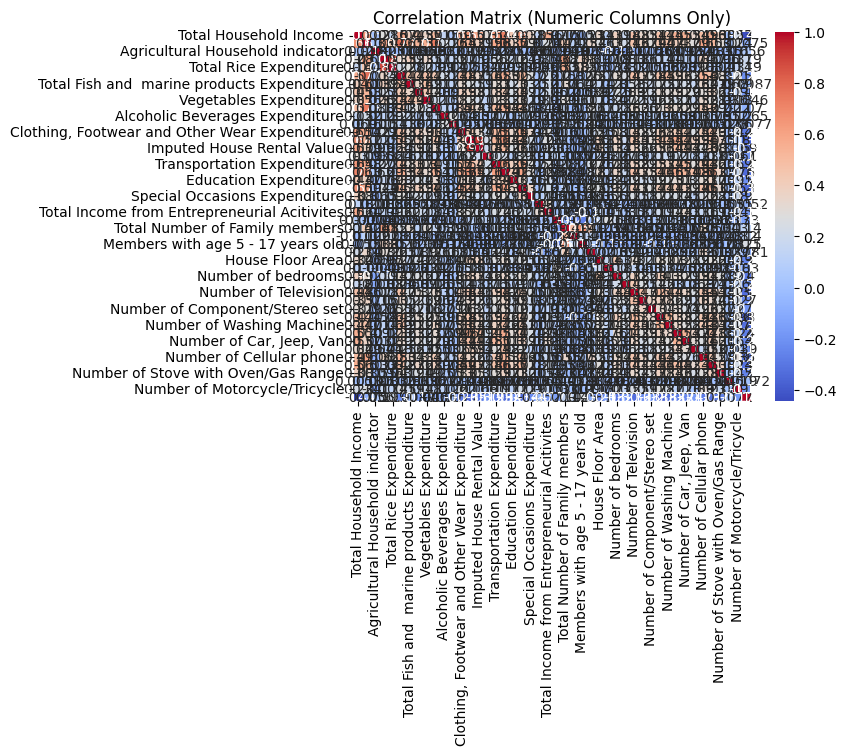

In [52]:
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Numeric Columns Only)")
plt.show()

<h1># Insight 14: Outliers in Total Household Income</h1>

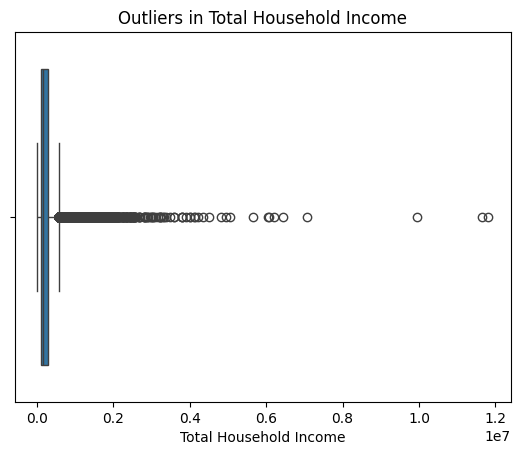

In [53]:
sns.boxplot(x=df["Total Household Income"])
plt.title("Outliers in Total Household Income")
plt.show()

<h1># Insight 15: Outliers in Total Food Expenditure</h1>

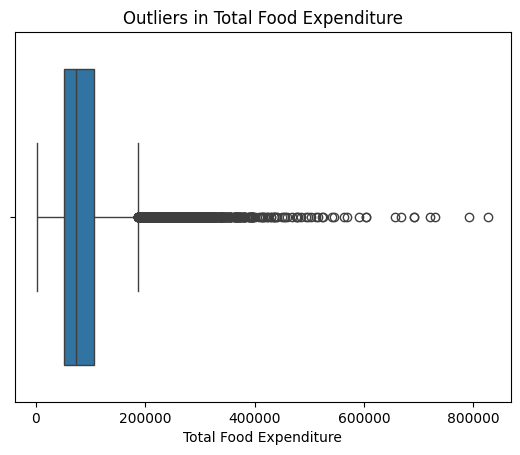

In [54]:
sns.boxplot(x=df["Total Food Expenditure"])
plt.title("Outliers in Total Food Expenditure")
plt.show()

<h1># Insight 16: Distribution of Family Size</h1>

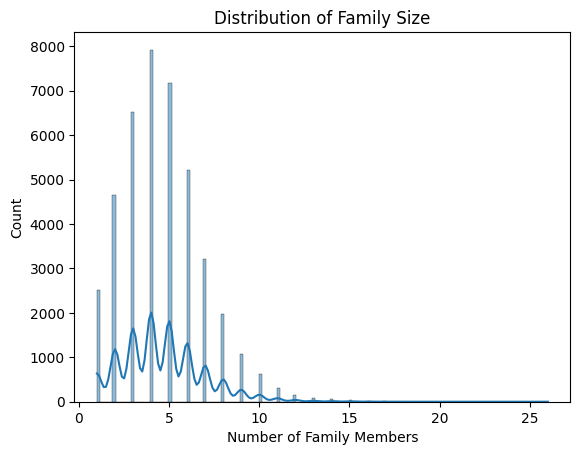

In [55]:
sns.histplot(df["Total Number of Family members"], kde=True)
plt.title("Distribution of Family Size")
plt.xlabel("Number of Family Members")
plt.show()

<h1># Insight 17: Average Income by Family Size Group</h1>

C:\Users\Admin\AppData\Local\Temp\ipykernel_5596\713554239.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_income_by_fam_size = df.groupby("Family_Size_Group")["Total Household Income"].mean()


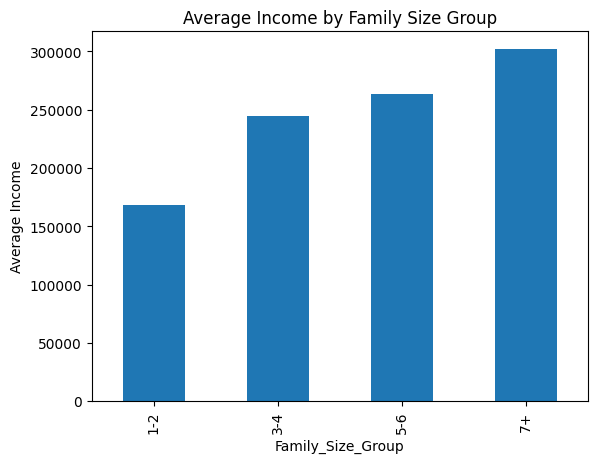

In [56]:
df["Family_Size_Group"] = pd.cut(df["Total Number of Family members"], bins=[0,2,4,6,100], labels=["1-2","3-4","5-6","7+"])
avg_income_by_fam_size = df.groupby("Family_Size_Group")["Total Household Income"].mean()
insights.append(("Which family size group has the highest average income?", avg_income_by_fam_size.idxmax()))
avg_income_by_fam_size.plot(kind='bar')
plt.title("Average Income by Family Size Group")
plt.ylabel("Average Income")
plt.show()

<h1># Insight 18: Average Food Expenditure by Family Size Group</h1>

C:\Users\Admin\AppData\Local\Temp\ipykernel_5596\1937851318.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_food_by_fam_size = df.groupby("Family_Size_Group")["Total Food Expenditure"].mean()


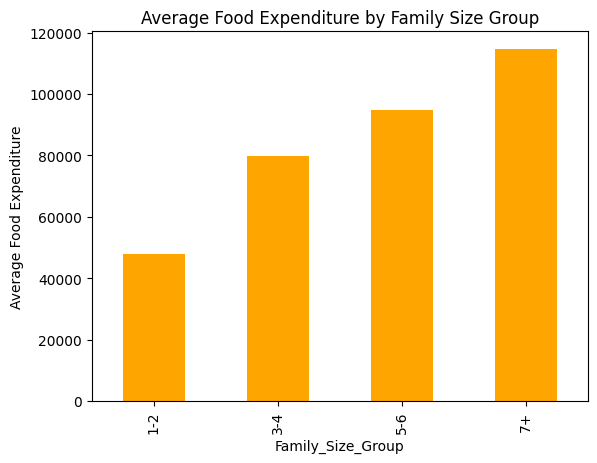

In [57]:
avg_food_by_fam_size = df.groupby("Family_Size_Group")["Total Food Expenditure"].mean()
insights.append(("Which family size group spends the most on food?", avg_food_by_fam_size.idxmax()))
avg_food_by_fam_size.plot(kind='bar', color='orange')
plt.title("Average Food Expenditure by Family Size Group")
plt.ylabel("Average Food Expenditure")
plt.show()

<h1># Insight 19: Top 5 Households by Total Income</h1>

In [58]:
top5_income = df.nlargest(5, "Total Household Income")[["Region", "Total Household Income"]]
insights.append(("Which households have the highest income?", top5_income))
print(top5_income)

                       Region  Total Household Income
2139     VI - Western Visayas                11815988
1238     VI - Western Visayas                11639365
30865  VIII - Eastern Visayas                 9952913
9382    VII - Central Visayas                 7082152
39302                     NCR                 6452314


<h1># Insight 20: Top 5 Households by Total Food Expenditure</h1>

In [59]:
top5_food = df.nlargest(5, "Total Food Expenditure")[["Region", "Total Food Expenditure"]]
insights.append(("Which households spend the most on food?", top5_food))
print(top5_food)

                      Region  Total Food Expenditure
9292   VII - Central Visayas                  827565
4159   VII - Central Visayas                  791848
31997     XII - SOCCSKSARGEN                  729606
530                   Caraga                  720007
32742     XII - SOCCSKSARGEN                  691917
